<a href="https://colab.research.google.com/github/ShabnaIlmi/Data-Science-Group-Project/blob/main/DSGP_startover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load and Inspect the Data**

In [1]:
import pandas as pd

# Load datasets
recipes_path = "/content/recipes_nodup.csv"
chem_path = "/content/chem.csv"

df_recipes = pd.read_csv(recipes_path)
df_chem = pd.read_csv(chem_path)

# Display first few rows of each dataset
print("📌 recipes_nodup.csv:")
print(df_recipes.head(), "\n\n")

print("📌 chem.csv:")
print(df_chem.head(), "\n\n")

# Check dataset shapes
print(f"🔍 recipes_nodup.csv Shape: {df_recipes.shape}")
print(f"🔍 chem.csv Shape: {df_chem.shape}")

# Show column names
print("🛠 recipes_nodup Columns:", df_recipes.columns)
print("🛠 chem Columns:", df_chem.columns)

# Check missing values
print("⚠️ Missing values in recipes_nodup:\n", df_recipes.isnull().sum(), "\n")
print("⚠️ Missing values in chem:\n", df_chem.isnull().sum(), "\n")


📌 recipes_nodup.csv:
   Recipe ID                                    Chemical Names  \
0          1               Ephedrine + Red Phosphorus + Iodine   
1          2             Toluene + Nitric Acid + Sulfuric Acid   
2          3       Hydrogen Peroxide + Acetone + Sulfuric Acid   
3          4  Ephedrine + Potassium Permanganate + Acetic Acid   
4          5             Potassium Nitrate + Charcoal + Sulfur   

                     Formulas   Quantities (g/mL)  \
0           C10H15NO + P + I2     30g + 15g + 10g   
1         C7H8 + HNO3 + H2SO4  50mL + 30mL + 40mL   
2        H2O2 + C3H6O + H2SO4   20mL + 30mL + 5mL   
3  C10H15NO + KMnO4 + CH3COOH    25g + 10g + 50mL   
4                KNO3 + C + S     75g + 15g + 10g   

                         CAS Numbers    Solvent Used  \
0   299-42-3 + 7723-14-0 + 7553-56-2  Acetone, Ether   
1   108-88-3 + 7697-37-2 + 7664-93-9             NaN   
2    7722-84-1 + 67-64-1 + 7664-93-9             NaN   
3     299-42-3 + 7722-64-7 + 64-19-7   

In [2]:
# Check data types of columns
print("🔍 Data types in recipes_nodup.csv:\n", df_recipes.dtypes, "\n")
print("🔍 Data types in chem.csv:\n", df_chem.dtypes, "\n")


🔍 Data types in recipes_nodup.csv:
 Recipe ID                                       int64
Chemical Names                                 object
Formulas                                       object
Quantities (g/mL)                              object
CAS Numbers                                    object
Solvent Used                                   object
Reaction Conditions                            object
Toxicity Level                                 object
Flammability (Yes/No)                          object
Reactivity (Stable/Unstable)                   object
Explosiveness (1-10)                            int64
Health Risk Score (0-100)                       int64
Environmental Hazard (Yes/No)                  object
Dual Use Potential (Yes/No)                    object
Intended Use                                   object
Export Restriction (Yes/No)                    object
Controlled Substance (Yes/No)                  object
Risk Assessment Score (0-100)                 

**Check Missing Values and Remove Duplicates**

In [3]:
print("📌 Duplicate rows in recipes_nodup:", df_recipes.duplicated().sum())
print("📌 Duplicate rows in chem:", df_chem.duplicated().sum())

print("⚠️ Missing values in recipes_nodup:\n", df_recipes.isnull().sum(), "\n")
print("⚠️ Missing values in chem:\n", df_chem.isnull().sum(), "\n")



📌 Duplicate rows in recipes_nodup: 0
📌 Duplicate rows in chem: 0
⚠️ Missing values in recipes_nodup:
 Recipe ID                                       0
Chemical Names                                  0
Formulas                                        0
Quantities (g/mL)                               0
CAS Numbers                                     0
Solvent Used                                   89
Reaction Conditions                             0
Toxicity Level                                  0
Flammability (Yes/No)                           0
Reactivity (Stable/Unstable)                    0
Explosiveness (1-10)                            0
Health Risk Score (0-100)                       0
Environmental Hazard (Yes/No)                   0
Dual Use Potential (Yes/No)                     0
Intended Use                                    0
Export Restriction (Yes/No)                     0
Controlled Substance (Yes/No)                   0
Risk Assessment Score (0-100)                   

In [4]:
# Display unique values for categorical columns
print("Unique values in key columns (recipes_nodup):\n")
for col in df_recipes.columns:
    print(f"{col}: {df_recipes[col].nunique()} unique values")

print("\n🛠 Unique values in key columns (chem):\n")
for col in df_chem.columns:
    print(f"{col}: {df_chem[col].nunique()} unique values")


Unique values in key columns (recipes_nodup):

Recipe ID: 150 unique values
Chemical Names: 149 unique values
Formulas: 140 unique values
Quantities (g/mL): 85 unique values
CAS Numbers: 142 unique values
Solvent Used: 4 unique values
Reaction Conditions: 65 unique values
Toxicity Level: 5 unique values
Flammability (Yes/No): 2 unique values
Reactivity (Stable/Unstable): 3 unique values
Explosiveness (1-10): 10 unique values
Health Risk Score (0-100): 18 unique values
Environmental Hazard (Yes/No): 2 unique values
Dual Use Potential (Yes/No): 2 unique values
Intended Use: 106 unique values
Export Restriction (Yes/No): 2 unique values
Controlled Substance (Yes/No): 2 unique values
Risk Assessment Score (0-100): 18 unique values
Regulatory Body: 7 unique values
Compliance Status (Compliant/Non-compliant): 2 unique values
Risk Category: 4 unique values
Risk Score (0-100): 16 unique values

🛠 Unique values in key columns (chem):

ID: 401 unique values
Chemical name: 393 unique values
molar

**Preprocessing recipes_nodup.csv**

In [5]:
# Fill missing values with "Unknown"
df_recipes["Solvent Used"].fillna("Unknown", inplace=True)


<ipython-input-5-d9d1a59aa268>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_recipes["Solvent Used"].fillna("Unknown", inplace=True)


In [6]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# ✅ Load Dataset
recipes_df = df_recipes

# ✅ Step 1: Combine Chemical Names and Quantities
def combine_chemicals(row):
    chemicals = row['Chemical Names'].split(' + ')
    quantities = row['Quantities (g/mL)'].split(' + ')
    combined = [f"{chem.strip()}:{re.sub(r'[^0-9.]+', '', qty)}" for chem, qty in zip(chemicals, quantities)]
    return ' + '.join(combined)

recipes_df['Combined Recipe'] = recipes_df.apply(combine_chemicals, axis=1)

# ✅ Step 2: Define Features and Targets
X = recipes_df[['Combined Recipe']]
y = recipes_df[[
    "Flammability (Yes/No)", "Reactivity (Stable/Unstable)",
    "Explosiveness (1-10)", "Health Risk Score (0-100)",
    "Risk Score (0-100)", "Risk Category"
]]

# ✅ Step 3: Encode Categorical Targets (Yes/No, Stable/Unstable)
binary_cols = ["Flammability (Yes/No)", "Reactivity (Stable/Unstable)"]
for col in binary_cols:
    y.loc[:, col] = y[col].apply(lambda x: 1 if x in ["Yes", "Stable"] else 0)

# ✅ Step 4: Normalize Numerical Targets Safely
num_cols = ["Explosiveness (1-10)", "Health Risk Score (0-100)", "Risk Score (0-100)"]
scaler = MinMaxScaler()
y.loc[:, num_cols] = scaler.fit_transform(y[num_cols])

# ✅ Step 5: Encode Risk Category (Low/Mid/High)
y.loc[:, 'Risk Category'] = y['Risk Category'].map({'Low': 0, 'Mid': 1, 'High': 2})

# ✅ Step 6: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Dataset Prepared for Multi-Output Training.")


✅ Dataset Prepared for Multi-Output Training.


<ipython-input-6-f707e85c42fc>:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.5 1.  1.  0.3 0.6 0.9 0.8 0.5 1.  0.8 1.  0.8 0.9 0.7 0.4 0.9 1.  0.6
 1.  0.7 1.  0.8 1.  0.8 0.9 0.5 0.9 0.6 0.9 0.5 0.5 0.8 0.7 1.  0.9 0.8
 0.9 0.9 1.  0.7 1.  0.9 0.8 0.7 1.  0.5 0.9 0.7 0.4 0.8 1.  1.  1.  1.
 0.9 0.9 0.5 1.  1.  1.  0.7 0.8 0.9 1.  0.9 1.  0.7 1.  1.  0.9 0.8 0.7
 1.  0.8 0.8 0.9 0.8 0.9 0.4 0.9 1.  1.  0.8 0.9 1.  1.  0.  0.  0.4 0.
 0.  0.  0.  0.  0.  0.  0.  0.3 0.  0.4 0.9 0.5 0.4 0.9 0.  0.  0.  0.
 0.2 0.3 0.5 0.7 0.7 0.9 0.  0.  0.  0.3 0.4 0.5 0.7 0.9 0.  0.  0.  0.
 0.3 0.5 0.7 0.8 0.  0.  0.  0.3 0.4 0.7 0.5 0.7 0.5 0.9 0.5 0.4 0.7 0.8
 1.  0.  0.  0.  0.  0.5]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  y.loc[:, num_cols] = scaler.fit_transform(y[num_cols])
<ipython-input-6-f707e85c42fc>:35: FutureWarning: Setting an item of incompatible dtype is depre

In [7]:
# Check for missing values in y_train
print("🔍 Missing Values in y_train:")
print(y_train.isnull().sum())


🔍 Missing Values in y_train:
Flammability (Yes/No)            0
Reactivity (Stable/Unstable)     0
Explosiveness (1-10)             0
Health Risk Score (0-100)        0
Risk Score (0-100)               0
Risk Category                   81
dtype: int64


In [8]:
# Fill missing numerical values with median and categorical with mode
y_train.fillna({
    "Explosiveness (1-10)": y_train["Explosiveness (1-10)"].median(),
    "Health Risk Score (0-100)": y_train["Health Risk Score (0-100)"].median(),
    "Risk Score (0-100)": y_train["Risk Score (0-100)"].median(),
    "Flammability (Yes/No)": y_train["Flammability (Yes/No)"].mode()[0],
    "Reactivity (Stable/Unstable)": y_train["Reactivity (Stable/Unstable)"].mode()[0],
    "Risk Category": y_train["Risk Category"].mode()[0]
}, inplace=True)


<ipython-input-8-9b50d04171f2>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train.fillna({


In [9]:
# Split classification and regression targets
classification_targets = ["Flammability (Yes/No)", "Reactivity (Stable/Unstable)", "Risk Category"]
regression_targets = ["Explosiveness (1-10)", "Health Risk Score (0-100)", "Risk Score (0-100)"]

y_train_class = y_train[classification_targets]
y_train_reg = y_train[regression_targets]


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize and fit the vectorizer
vectorizer = TfidfVectorizer(max_features=100)
X_train_recipe_tfidf = vectorizer.fit_transform(X_train["Combined Recipe"]).toarray()

# Convert to DataFrame and reset the index
X_train_recipe_tfidf = pd.DataFrame(X_train_recipe_tfidf, columns=vectorizer.get_feature_names_out())
X_train_recipe_tfidf.reset_index(drop=True, inplace=True)

# Drop the original text column and combine with the TF-IDF features
X_train_processed = pd.concat([X_train.drop(columns=["Combined Recipe"]).reset_index(drop=True), X_train_recipe_tfidf], axis=1)

print("✅ TF-IDF Vectorization Done!")


✅ TF-IDF Vectorization Done!


In [11]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib

# Train classification model
classifier = MultiOutputClassifier(RandomForestClassifier(random_state=42))
classifier.fit(X_train_processed, y_train_class)

# Save the classifier model
joblib.dump(classifier, 'multi_output_classifier_model.pkl')
print("✅ Classification Model Trained and Saved!")


✅ Classification Model Trained and Saved!


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize and fit the vectorizer
vectorizer = TfidfVectorizer(max_features=100)
X_train_recipe_tfidf = vectorizer.fit_transform(X_train["Combined Recipe"]).toarray()

# Convert TF-IDF results to DataFrame
X_train_recipe_tfidf = pd.DataFrame(X_train_recipe_tfidf, columns=vectorizer.get_feature_names_out())
X_train_recipe_tfidf.reset_index(drop=True, inplace=True)

# Combine TF-IDF with other numerical features
X_train_final = pd.concat([X_train.drop(columns=["Combined Recipe"]).reset_index(drop=True), X_train_recipe_tfidf], axis=1)

print("✅ TF-IDF Vectorization Done for Regression!")


✅ TF-IDF Vectorization Done for Regression!


In [13]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

# Initialize and train the regression model
regressor = MultiOutputRegressor(RandomForestRegressor(random_state=42))
regressor.fit(X_train_final, y_train_reg)

# Save the trained model
joblib.dump(regressor, 'multi_output_regressor_model.pkl')
print("✅ Regression Model Trained and Saved!")


✅ Regression Model Trained and Saved!


In [14]:
import joblib

# Save the trained vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
print("✅ TF-IDF Vectorizer Saved!")


✅ TF-IDF Vectorizer Saved!


In [15]:
def preprocess_new_recipe(new_recipe_raw):
    import re

    # Combine chemicals with quantities into the same format
    def combine_chemicals(chemicals, quantities):
        combined = [f"{chem.strip()}:{re.sub(r'[^0-9.]+', '', qty)}"
                    for chem, qty in zip(chemicals.split("+"), quantities.split("+"))]
        return " + ".join(combined)

    # Apply combination
    new_recipe_raw["Combined Recipe"] = new_recipe_raw.apply(
        lambda row: combine_chemicals(row["Chemical Names"], row["Quantities (g/mL)"]), axis=1
    )

    return new_recipe_raw

# Example new input
new_recipe_raw = pd.DataFrame({
    "Chemical Names": ["Hydrazine + Red Fuming + Nitric Acid"],
    "Quantities (g/mL)": ["300000000000 + 1000000000000 + 50000"]
})

# Preprocess the input
new_recipe_processed = preprocess_new_recipe(new_recipe_raw)
print("✅ New Recipe Preprocessed!")


✅ New Recipe Preprocessed!


In [16]:
# Load the saved vectorizer and model
vectorizer = joblib.load('tfidf_vectorizer.pkl')
regressor = joblib.load('multi_output_regressor_model.pkl')

# Vectorize the new recipe
new_recipe_tfidf = vectorizer.transform(new_recipe_processed["Combined Recipe"]).toarray()
new_recipe_tfidf = pd.DataFrame(new_recipe_tfidf, columns=vectorizer.get_feature_names_out())

# If there are additional numerical features, add them here
# (In this case, we only have TF-IDF features)
X_new = new_recipe_tfidf

print("✅ New Recipe Vectorized and Ready for Prediction!")


✅ New Recipe Vectorized and Ready for Prediction!


In [17]:
# Perform the prediction
predictions = regressor.predict(X_new)

# Format and display the results
predicted_df = pd.DataFrame(predictions, columns=[
    "Explosiveness (1-10)", "Health Risk Score (0-100)", "Risk Score (0-100)"
])

print("\n🔍 Predicted Detailed Risk Analysis:")
print(predicted_df)



🔍 Predicted Detailed Risk Analysis:
   Explosiveness (1-10)  Health Risk Score (0-100)  Risk Score (0-100)
0                 0.963                   0.959579            0.991222


In [18]:
def determine_risk_level(row):
    if any([
        row["Explosiveness (1-10)"] > 90,
        row["Health Risk Score (0-100)"] > 90,
        row["Risk Score (0-100)"] > 90
    ]):
        return "Very High Risk"
    elif any([
        71 <= row["Explosiveness (1-10)"] <= 90,
        71 <= row["Health Risk Score (0-100)"] <= 90,
        71 <= row["Risk Score (0-100)"] <= 90
    ]):
        return "High Risk"
    elif any([
        31 <= row["Explosiveness (1-10)"] <= 70,
        31 <= row["Health Risk Score (0-100)"] <= 70,
        31 <= row["Risk Score (0-100)"] <= 70
    ]):
        return "Medium Risk"
    else:
        return "Low Risk"

# Perform the prediction
predictions = regressor.predict(X_new)

# Rescale the predictions back to original scale
predicted_df = pd.DataFrame({
    "Explosiveness (1-10)": predictions[:, 0] * 10,
    "Health Risk Score (0-100)": predictions[:, 1] * 100,
    "Risk Score (0-100)": predictions[:, 2] * 100
})

# Determine overall risk level
predicted_df["Overall Risk Level"] = predicted_df.apply(determine_risk_level, axis=1)

# Display the detailed analysis with overall risk level
print("\n🔍 Predicted Detailed Risk Analysis with Overall Risk Level:")
print(predicted_df)

# Output overall risk level in text
for idx, row in predicted_df.iterrows():
    print(f"\n🔔 Overall Risk Level for Recipe {idx + 1}: {row['Overall Risk Level']}")



🔍 Predicted Detailed Risk Analysis with Overall Risk Level:
   Explosiveness (1-10)  Health Risk Score (0-100)  Risk Score (0-100)  \
0                  9.63                  95.957895           99.122222   

  Overall Risk Level  
0     Very High Risk  

🔔 Overall Risk Level for Recipe 1: Very High Risk


In [21]:
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import joblib

class CombinedModel:
    def __init__(self):
        # Initialize the classification and regression models
        self.classifier = MultiOutputClassifier(RandomForestClassifier(random_state=42))
        self.regressor = MultiOutputRegressor(RandomForestRegressor(random_state=42))

    def fit(self, X, y_class, y_reg):
        """Train both classification and regression models."""
        self.classifier.fit(X, y_class)
        self.regressor.fit(X, y_reg)

    def predict(self, X):
        """Predict both classification and regression outcomes."""
        class_preds = self.classifier.predict(X)
        reg_preds = self.regressor.predict(X)
        return class_preds, reg_preds

    def save(self, path):
        """Save the combined model."""
        joblib.dump(self, path)

    @staticmethod
    def load(path):
        """Load the combined model."""
        return joblib.load(path)


In [22]:
# Initialize the combined model
combined_model = CombinedModel()

# Train the model using both classification and regression targets
combined_model.fit(X_train_final, y_train_class, y_train_reg)

# Save the trained combined model
combined_model.save('combined_model.pkl')
print("✅ Combined Model Trained and Saved!")


✅ Combined Model Trained and Saved!


In [25]:
# Fit the vectorizer with the training 'Combined Recipe'
vectorizer = TfidfVectorizer()
X_train_text = vectorizer.fit_transform(X_train["Combined Recipe"]).toarray()

# Save the fitted vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("✅ Vectorizer fitted and saved!")



✅ Vectorizer fitted and saved!


In [26]:
# Load the fitted vectorizer (if not already in memory)
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Transform the 'Combined Recipe' in test data
X_test_text = vectorizer.transform(X_test["Combined Recipe"]).toarray()

# Combine vectorized text with other features
X_test_final = np.hstack([X_test_text, X_test.drop(columns=["Combined Recipe"]).values])

print("✅ Test data processed for prediction.")


✅ Test data processed for prediction.


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
# Fit the vectorizer with the training 'Combined Recipe'
# Setting max_features to 100 for consistent feature size
vectorizer = TfidfVectorizer(max_features=100)
X_train_text = vectorizer.fit_transform(X_train["Combined Recipe"]).toarray()

# Save the fitted vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("✅ Vectorizer fitted and saved!")

✅ Vectorizer fitted and saved!


In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Load the saved vectorizer to ensure consistent feature transformation
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# ✅ Vectorize the test data using the same fitted vectorizer
X_test_text = vectorizer.transform(X_test["Combined Recipe"]).toarray()

# ✅ Ensure other features align with training features (if any)
# For this case, drop "Combined Recipe" from X_test if present
X_test_others = X_test.drop(columns=["Combined Recipe"], errors='ignore').values

# ✅ Combine features
X_test_final = np.hstack([X_test_text, X_test_others])

# 🔄 Predict using the combined model
class_preds, reg_preds = combined_model.predict(X_test_final)

# ... (rest of your code for evaluation) ...

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/l

In [35]:
# ipython-input-25-5c8121f8712c
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
# Fit the vectorizer with the training 'Combined Recipe'
# Setting max_features to 100 for consistent feature size
vectorizer = TfidfVectorizer(max_features=100)
X_train_text = vectorizer.fit_transform(X_train["Combined Recipe"]).toarray()

# Save the fitted vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("✅ Vectorizer fitted and saved!")

✅ Vectorizer fitted and saved!


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/l


📄 Overall Classification Report for Risk Levels:
                precision    recall  f1-score   support

     High Risk       0.12      0.33      0.18         3
      Low Risk       1.00      0.50      0.67         4
   Medium Risk       0.33      0.25      0.29         4
Very High Risk       0.82      0.74      0.78        19

      accuracy                           0.60        30
     macro avg       0.57      0.46      0.48        30
  weighted avg       0.71      0.60      0.64        30



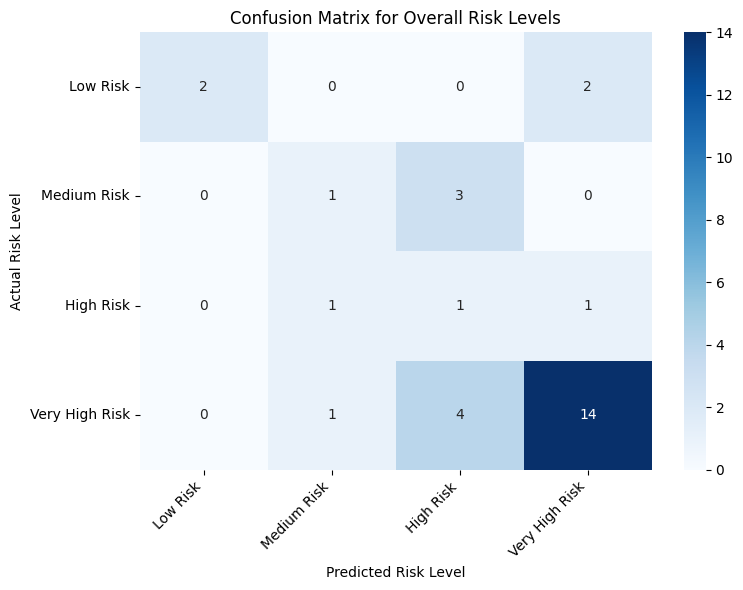

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import numpy as np

# Load the saved vectorizer to ensure consistent feature transformation
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Vectorize the test data using the same fitted vectorizer
X_test_text = vectorizer.transform(X_test["Combined Recipe"]).toarray()

# Ensure other features align with training features
X_test_others = X_test.drop(columns=["Combined Recipe"], errors='ignore').values

# Combine features
X_test_final = np.hstack([X_test_text, X_test_others])

# Predict using the combined model
class_preds, reg_preds = combined_model.predict(X_test_final)

# Extract actual risk levels from test data
actual_risk_levels = y_test[["Risk Score (0-100)"]].applymap(
    lambda x: "Low Risk" if x <= 0.3 else
              "Medium Risk" if x <= 0.7 else
              "High Risk" if x <= 0.9 else
              "Very High Risk"
).values.flatten()

# Extract predicted risk levels from regression predictions
predicted_risk_levels = [
    "Low Risk" if score <= 0.3 else
    "Medium Risk" if score <= 0.7 else
    "High Risk" if score <= 0.9 else
    "Very High Risk"
    for score in reg_preds[:, 2]  # Assuming the third column is Risk Score
]

# Classification Report
print("\n📄 Overall Classification Report for Risk Levels:")
print(classification_report(actual_risk_levels, predicted_risk_levels, zero_division=0))

# Confusion Matrix
labels = ["Low Risk", "Medium Risk", "High Risk", "Very High Risk"]
cm = confusion_matrix(actual_risk_levels, predicted_risk_levels, labels=labels)
plt.figure(figsize=(8, 6))  # Adjust figure size for better visibility
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for Overall Risk Levels")
plt.xlabel("Predicted Risk Level")
plt.ylabel("Actual Risk Level")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels vertical
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()